### Importing needed repositories

In [1]:
## Basics 
import numpy as np
import pandas as pd

## Visualization
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## ML
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve

## Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

### Import Dataset

In [3]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/ashwini1484/Churn-Modelling/main/Churn%20Model%20Dataset.csv?token=GHSAT0AAAAAACFS5JSPOFWLF7ANQ4DHOBG2ZGHIQ3Q',index_col = 0)

## Split the data to create a train and test set
#churn_train, churn_test = train_test_split(churn_data, test_size=0.25)

In [4]:
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Understanding the data

In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

##### The dataset does not have any non null entries. Total charges which has to be a numeric field seems to be an object. Find the reason and rectify

In [28]:
sorted(churn_data['TotalCharges'].unique())

[0.0,
 18.8,
 18.85,
 18.9,
 19.0,
 19.05,
 19.1,
 19.15,
 19.2,
 19.25,
 19.3,
 19.4,
 19.45,
 19.5,
 19.55,
 19.6,
 19.65,
 19.7,
 19.75,
 19.8,
 19.85,
 19.9,
 19.95,
 20.0,
 20.05,
 20.1,
 20.15,
 20.2,
 20.25,
 20.3,
 20.35,
 20.4,
 20.45,
 20.5,
 20.55,
 20.6,
 20.65,
 20.7,
 20.75,
 20.8,
 20.85,
 20.9,
 20.95,
 21.0,
 21.05,
 21.1,
 23.45,
 24.0,
 24.05,
 24.2,
 24.25,
 24.4,
 24.45,
 24.6,
 24.7,
 24.75,
 24.8,
 24.9,
 25.0,
 25.05,
 25.1,
 25.15,
 25.2,
 25.25,
 25.3,
 25.35,
 25.4,
 25.7,
 25.75,
 25.8,
 25.85,
 27.55,
 28.3,
 29.15,
 29.7,
 29.85,
 29.9,
 29.95,
 30.2,
 30.5,
 30.55,
 31.2,
 31.35,
 31.55,
 31.9,
 32.7,
 33.2,
 33.6,
 33.7,
 34.7,
 34.75,
 34.8,
 35.0,
 35.05,
 35.1,
 35.25,
 35.45,
 35.55,
 35.75,
 35.85,
 35.9,
 36.45,
 36.55,
 36.8,
 37.2,
 38.0,
 38.15,
 38.25,
 38.45,
 38.7,
 38.8,
 39.25,
 39.3,
 39.65,
 39.8,
 39.85,
 40.1,
 40.2,
 40.25,
 40.9,
 41.2,
 41.85,
 42.45,
 42.7,
 42.9,
 43.15,
 43.3,
 43.8,
 43.85,
 43.95,
 44.0,
 44.05,
 44.1,
 44.15,
 

###### Rows with Total Charges registered as spaces is causing issues in datatype

In [15]:
churn_data[churn_data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No


###### Upon examination of rows with total charges registered as spaces, we see that the tenue is 0. These customers should be new. Hence, we will replace spaces in total charges with 0 and convert it to float type

In [18]:
churn_data['TotalCharges'] = np.where(churn_data['TotalCharges']==' ',0,churn_data['TotalCharges'])

In [27]:
churn_data['TotalCharges'].dtype

dtype('float64')

In [26]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype(float)

##### Univariate Analysis

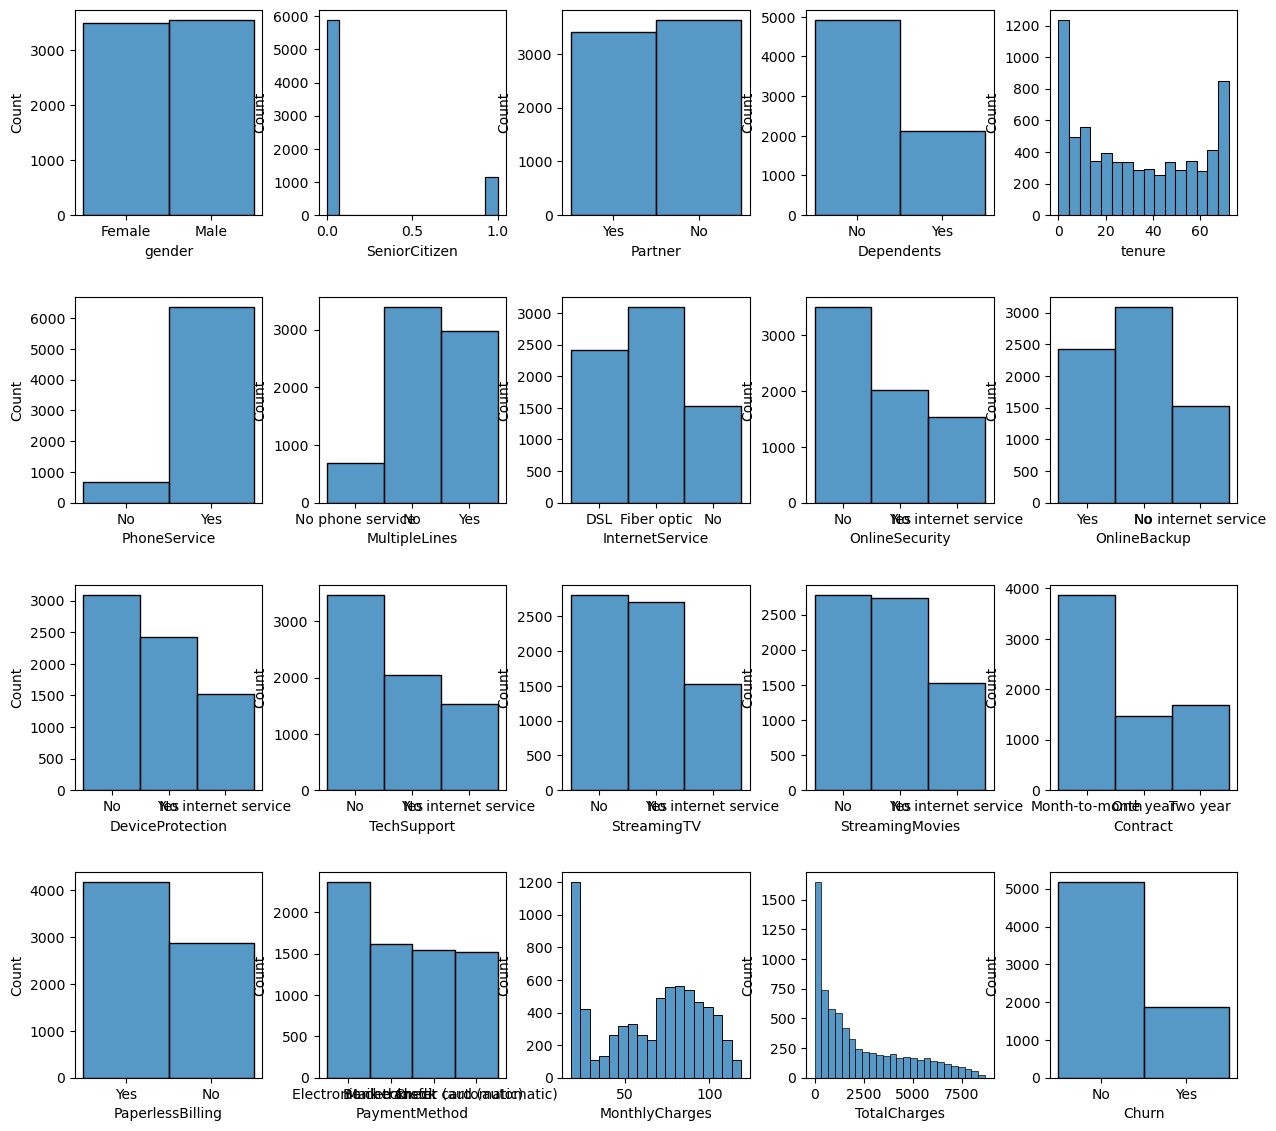

In [30]:
fig, ax = plt.subplots(4, 5, figsize=(15, 12)) ##Create subplot areas
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.3, hspace=0.4) ## Adjust formatting of histograms
for variable, subplot in zip(churn_data.columns, ax.flatten()): ## Get the variables and their position
    sns.histplot(churn_data[variable], ax=subplot) ## Plot the histogram

**Gender**: The dataset has equal number of males and females <br>**Senior Citizen**: Around 14% of the customers are senior citizens.<br>**Dependents**: Around 28% of the customers have dependents<br>**Tenure**:Around 50% of the customers have a tenure of less than or equal to 2 years or 24 months<br>**Internet Services**: Around 21% of the customers have not opted for internet services.<br>**Contract**: Around 57% of the customers renew their contract month-on-month. Rest are 1 year and 2 year contracts<br>**Monthly Charges**: Most customers have an average bill value of around <br>**Churn**: Around 30% of the customers are churning out of the business

##### Bivariate analysis

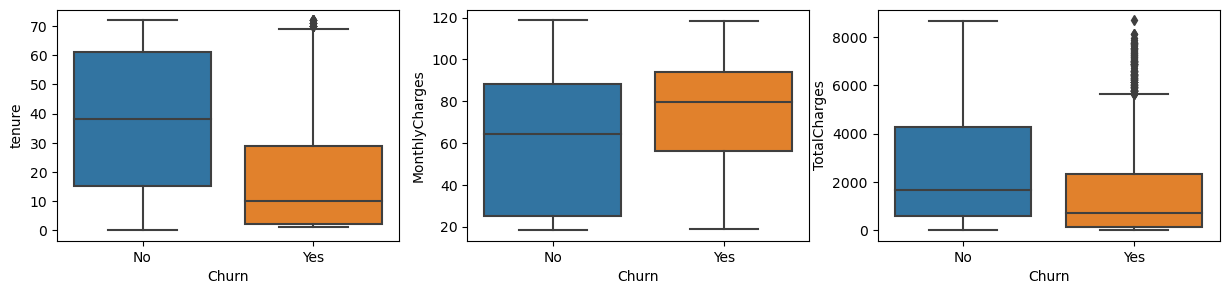

In [62]:
num_var = churn_data.select_dtypes(include=np.number).columns ##Get all numeric columns
num_var1 = num_var.drop('SeniorCitizen')
fig,ax = plt.subplots(1,3,figsize=(15,3))

for variable,subplot in zip(num_var1,ax.flatten()):
    sns.boxplot(x = churn_data['Churn'],y=churn_data[variable],ax=subplot)

Customers who churn have lesser tenure, more monthly charges. Although the monthly charges is high, total charges is low for churning customers because the tenure is less

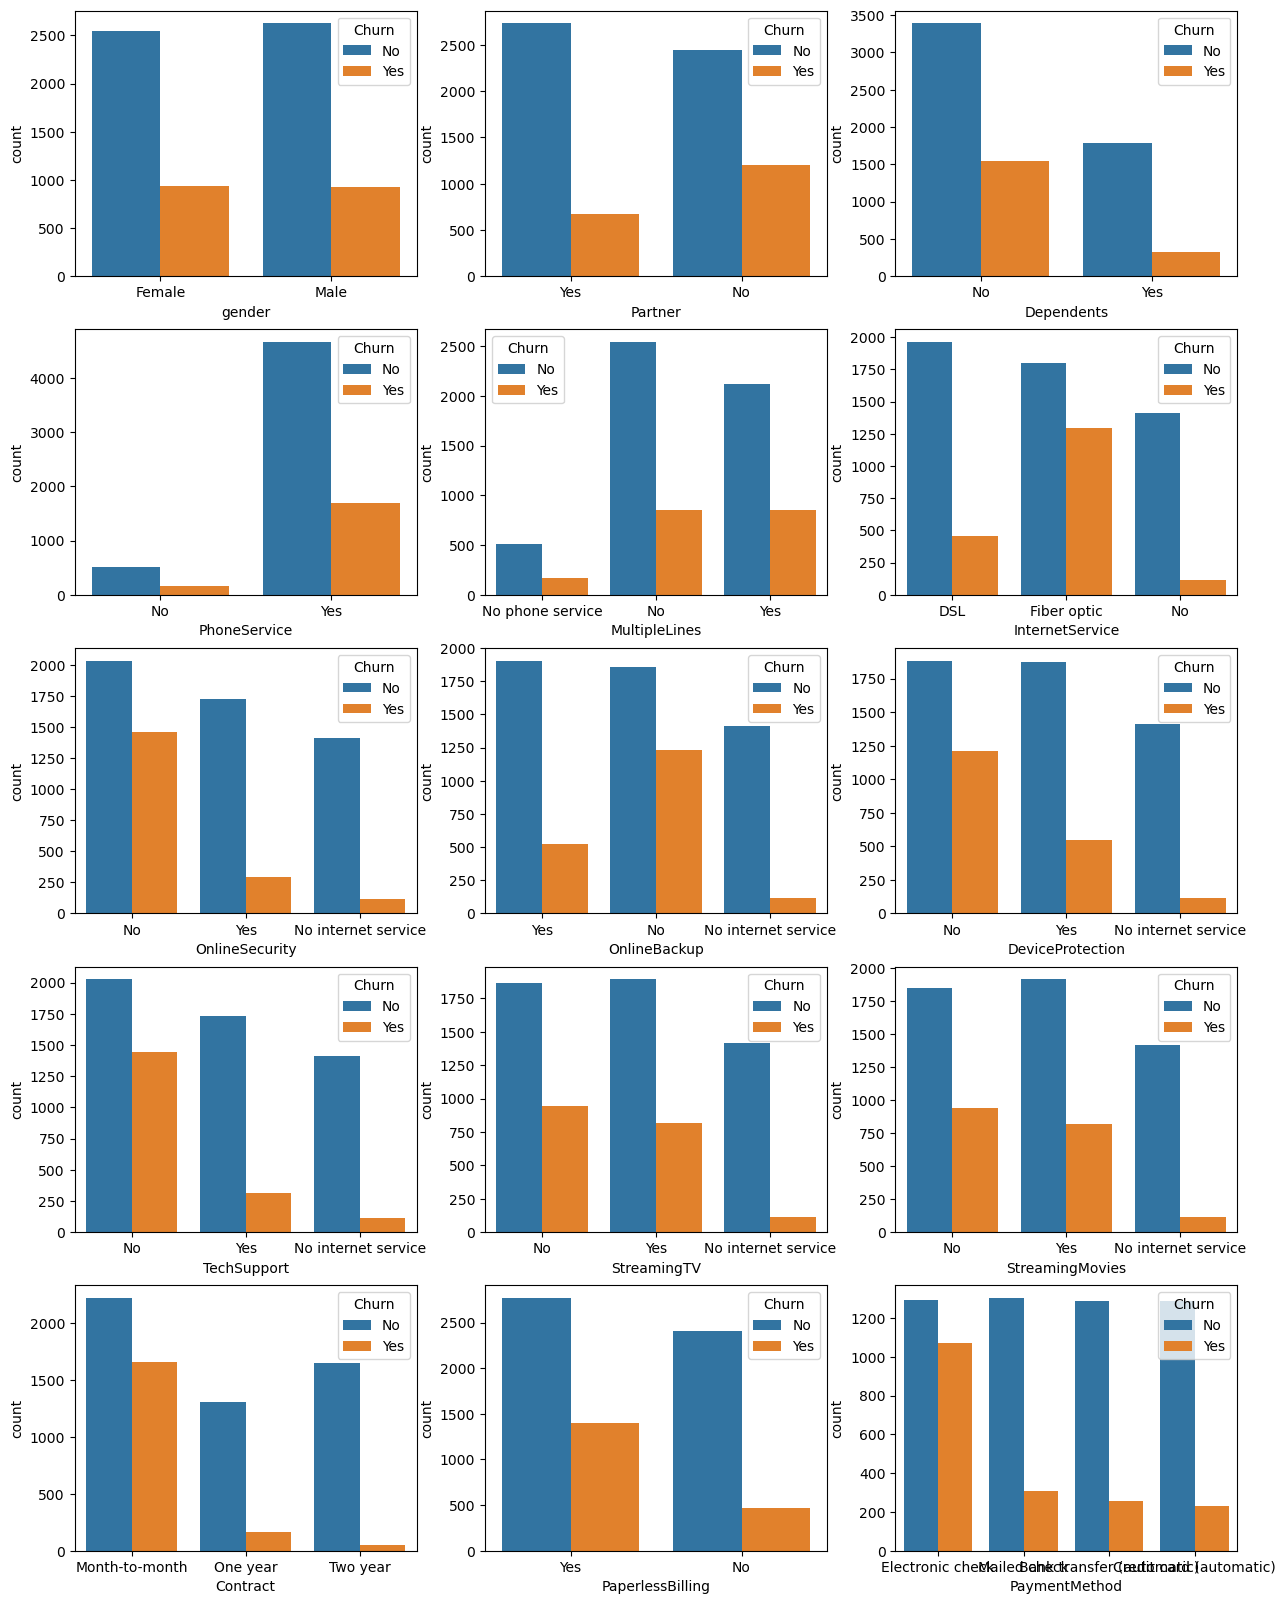

In [81]:
obj_var = churn_data.select_dtypes(exclude=np.number).columns ## Get all object columns
obj_var1 = obj_var.drop('Churn')
fig,ax=plt.subplots(5,3,figsize=(15,20))

for variable,subplot in zip(obj_var1,ax.flatten()):
    sns.countplot(x=churn_data[variable],hue=churn_data['Churn'],ax=subplot)

Customers who churn mostly have fibre optic internet service, month-to-month billing and electronic check as their payment method. Churning customers do not call tech support for issues

###### Train Test Split

In [86]:
train, test = train_test_split(churn_data, test_size=0.25, random_state=123)
X = train.drop(columns='Churn', axis=1)
y = train['Churn']

###### Creating a pipeline for execution

In [98]:
## Selecting categorical and numeric features
numerical_ix = X.select_dtypes(include=np.number).columns
categorical_ix = X.select_dtypes(exclude=np.number).columns

## Create preprocessing pipelines for each datatype
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse=False)),('scaler', StandardScaler())])

## Putting the preprocessing steps together
preprocessor = ColumnTransformer([('numerical', numerical_transformer, numerical_ix),
                                  ('categorical', categorical_transformer, categorical_ix)],
                                  remainder='passthrough')

In [99]:
preprocessor.fit_transform(X)

array([[ 2.28024791,  0.70771155,  0.18517545, ..., -0.52403616,
        -0.70961836, -0.54599235],
       [-0.43854881, -1.24899897, -0.64153776, ..., -0.52403616,
         1.40920819, -0.54599235],
       [-0.43854881, -0.14834931,  1.13356218, ...,  1.90826525,
        -0.70961836, -0.54599235],
       ...,
       [-0.43854881, -0.75982134,  0.7485405 , ..., -0.52403616,
         1.40920819, -0.54599235],
       [ 2.28024791, -0.14834931, -0.97155634, ..., -0.52403616,
        -0.70961836,  1.8315275 ],
       [-0.43854881, -1.20823417,  0.52352784, ..., -0.52403616,
         1.40920819, -0.54599235]])

In [100]:
## Creat list of classifiers we're going to try out
classifiers = [
KNeighborsClassifier(),
SVC(random_state=123),
DecisionTreeClassifier(random_state=123),
RandomForestClassifier(random_state=123),
AdaBoostClassifier(random_state=123),
GradientBoostingClassifier(random_state=123)
]

classifier_names = [
'KNeighborsClassifier()',
'SVC()',
'DecisionTreeClassifier()',
'RandomForestClassifier()',
'AdaBoostClassifier()',
'GradientBoostingClassifier()'
]
model_scores = []

## Looping through the classifiers
for classifier, name in zip(classifiers, classifier_names):
    pipe = Pipeline(steps=[('preprocessor', preprocessor),('selector', SelectKBest(k=len(X.columns))),
                           ('classifier', classifier)])
    score = cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean() 
    model_scores.append(score)

In [101]:
model_scores

[0.7877741869518357,
 0.7841463227626817,
 0.6619172494450016,
 0.8124045254407697,
 0.8451686815633901,
 0.8443667366978527]

In [102]:
model_performance = pd.DataFrame({'Classifier':classifier_names, 'Cross-validated AUC':model_scores}).sort_values('Cross-validated AUC', ascending = False, ignore_index=True)
display(model_performance)

,Classifier,Cross-validated AUC
0,AdaBoostClassifier(),0.845169
1,GradientBoostingClassifier(),0.844367
2,RandomForestClassifier(),0.812405
3,KNeighborsClassifier(),0.787774
4,SVC(),0.784146
5,DecisionTreeClassifier(),0.661917


In [103]:
pipe = Pipeline(steps=[
  ('preprocessor', preprocessor),
  ('selector', SelectKBest(k=len(X.columns))),
  ('classifier', AdaBoostClassifier(random_state=123))
])

In [106]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'selector', 'classifier', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numerical', 'preprocessor__categorical', 'preprocessor__numerical__memory', 'preprocessor__numerical__steps', 'preprocessor__numerical__verbose', 'preprocessor__numerical__scaler', 'preprocessor__numerical__scaler__copy', 'preprocessor__numerical__scaler__with_mean', 'preprocessor__numerical__scaler__with_std', 'preprocessor__categorical__memory', 'preprocessor__categorical__steps', 'preprocessor__categorical__verbose', 'preprocessor__categorical__encoder', 'preprocessor__categorical__scaler', 'preprocessor__categorical__encoder__categories', 'preprocessor__categorical__encoder__drop', 'preprocessor__categorical__encoder__dtype', 'preprocessor__categorical__encoder__handle_

In [108]:
grid = {
  "classifier__learning_rate":[0.01,0.1,1],
  "classifier__n_estimators":[100,200,300,400]
}
gridsearch = GridSearchCV(estimator=pipe, param_grid=grid, n_jobs= 1, scoring='roc_auc')
gridsearch.fit(X, y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
0.8472304840375957


AUCROC: 0.8401017566035399 
Accuracy: 0.7853492333901193


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


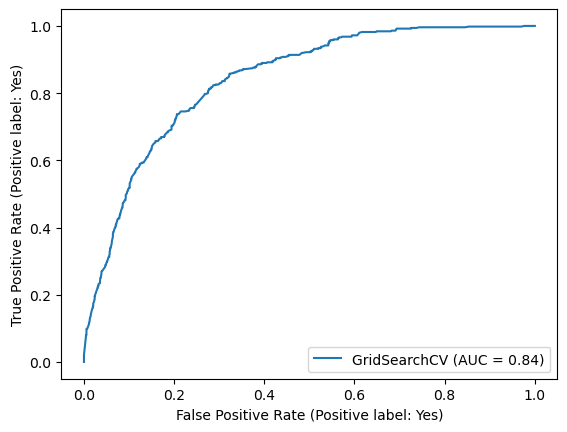

In [109]:
## Separate features and target for the test data
X_test = test.drop(columns='Churn', axis=1)
y_test = test['Churn']
## Refitting the training data with the best parameters
gridsearch.refit
## Creating the predictions
y_pred = gridsearch.predict(X_test)
y_score = gridsearch.predict_proba(X_test)[:, 1]
## Looking at the performance
print('AUCROC:', roc_auc_score(y_test, y_score), '\nAccuracy:', accuracy_score(y_test, y_pred))
# Plotting the ROC curve
plot_roc_curve(gridsearch, X_test, y_test)
plt.show()

In [115]:
y_score

array([0.4840574 , 0.39994574, 0.40290237, ..., 0.44166808, 0.45312151,
       0.50730527])

In [116]:
for j in np.arange(0.1,1,0.1):
    cust_prob = j
    cust_acc = []
    for i in range(0,len(y_score)):
        if np.array(y_score)[i] > cust_prob:
            a = 'Yes'
        else:
            a = 'No'
        cust_acc.append(a)
    print(round(cust_prob,1),round(accuracy_score(y_test,cust_acc),3))

0.1 0.283
0.2 0.283
0.3 0.283
0.4 0.369
0.5 0.785
0.6 0.717
0.7 0.717
0.8 0.717
0.9 0.717
